# COVID-19's effect on Twitch & which games are the best to stream
### By Charles Laming
#### December 20, 2020
# Introduction
It's no secret that COVID-19 has had a huge effect on everyone's lives this year. People have been staying inside a lot more and as a result, many are spending much more time online than before. One such activity that many people turned to this year is video games! All you need is a computer/console/phone and an internet connection to play a wide variety of games. However, playing video games is only half the story.

[Twitch.tv](https://www.twitch.tv/), or simply Twitch, is a live streaming platform that launched in 2011 and was originally centered around video games. Since then, Twitch has grown to include categories for not just video games, but music, cooking, chatting, and anything else you could think of. Back in 2014, Amazon acquired Twitch for close to $1 billion, which has only fueled Twitch’s growth in the last few years. Anyone with an account can live stream on Twitch for free, although most users just watch others live stream and can chat with other users, including the streamer themselves. 

Personally, I watch live streams on Twitch several times a week, if not everyday. While I haven’t been keeping track, I would say that I have been watching more live streams on Twitch this year due to COVID-19 and wonder how Twitch has been affected as a whole. I wanted to see exactly how much of an effect COVID-19 has had on Twitch and whether it has also changed various viewing habits.

# Data 
The data I will be analyzing consists of two datasets from user [Ran.Kirsh](https://www.kaggle.com/rankirsh) on Kaggle. The two datasets include Twitch viewership statistics from January 2016 to October 2020, with one focusing on Twitch as a whole and the other focusing on individual categories (games/activities), specifically the top 200 categories by hours watched each month. The two datasets are stored locally as csv files and can be downloaded with a free Kaggle account [here](https://www.kaggle.com/rankirsh/evolution-of-top-games-on-twitch).

## Global data

In [1]:
import pandas as pd

global_data = pd.read_csv("Twitch_global_data.csv")
global_data.head()

,Year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,12149
1,2016,2,441859897,635769,1308032,7038520,20427,12134
2,2016,3,490669308,660389,1591551,7390957,20271,12234
3,2016,4,377975447,525696,1775120,6869719,16791,12282
4,2016,5,449836631,605432,1438962,7535519,19394,12424


## Game data

In [2]:
game_data = pd.read_csv("Twitch_game_data.csv", encoding='latin-1')
game_data.head()

,Game,Rank,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,League of Legends,1,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,Counter-Strike: Global Offensive,2,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,Dota 2,3,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,Hearthstone,4,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,Call of Duty: Black Ops III,5,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


# Part 1: How has COVID-19 affected Twitch?
Let’s start by seeing how hours watched and streams per month have changed since 2016 and see if there is anything different about 2020.

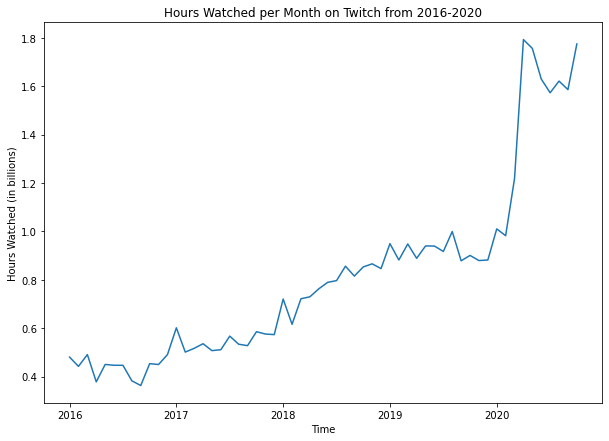

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# creating list with year positions for plot labeling
label_positions = []
counter = 0
for index, row in global_data.iterrows():
    if row['Month'] == 1:
        label_positions.append(counter)
    counter = counter + 1

fig, ax = plt.subplots(figsize=(10,7))
# plotting each month's hours watched in billions
ax.plot([x / 1000000000 for x in global_data['Hours_watched']])
ax.set_ylabel('Hours Watched (in billions)')
ax.set_xlabel('Time')
ax.set_title('Hours Watched per Month on Twitch from 2016-2020')
ax.set_xticks(label_positions)
ax.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])
plt.show()

There is a very clear spike in hours watched per month around the beginning of 2020, going from ~0.9-1 billion hours watched per month to ~1.8 billion. This spike lines up with the point in time when COVID-19 cases started to spike and many countries went into lockdown (or at least tried to). While there is growth leading up to 2020, this growth cannot account for the massive spike in hours watched per month.

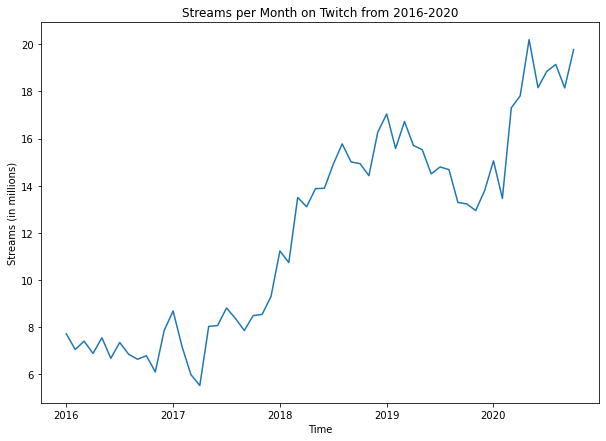

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
# plotting each month's streams in millions
ax.plot([x / 1000000 for x in global_data['Streams']])
ax.set_ylabel('Streams (in millions)')
ax.set_xlabel('Time')
ax.set_title('Streams per Month on Twitch from 2016-2020')
ax.set_xticks(label_positions)
ax.set_xticklabels(['2016', '2017', '2018', '2019', '2020'])
plt.show()

Similar to the previous plot, we can see an increase in the number of live streams per month at the start of 2020. There was another period of growth for Twitch in 2017 and 2018, which was actually larger than the growth from COVID-19. However, because anyone can stream and there are always more viewers than streamers, hours watched is a better metric for gauging activity on Twitch and will be the primary metric for analysis going forward.

## Hours watched between games/categories
Since more time was being spent watching live streams on Twitch, let's now look at hours watched per month for the top 5 games/categories per month from January 2019 - October 2020. I'll filter the dataframe for entries that are only ranked 1-5 for monthly watch time in 2019 and 2020.

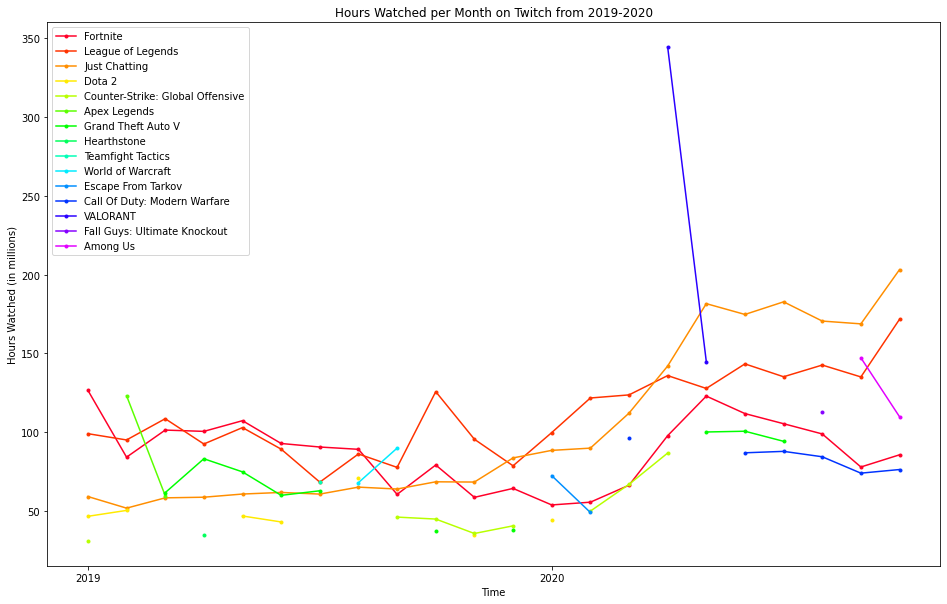

In [5]:
# creating a table with the top 5 games for each month since Jan 2019
game_data_top_5 = game_data[(game_data['Rank'] <= 5) & (game_data['Year'] >= 2019)]

#creating a dictionary to store which months each game was in the top 5 if repeatedly in the top 5
top_games = {}
for index, row in game_data_top_5.iterrows():
    if row['Game'] not in top_games.keys():
        top_games[row['Game']] = [None] * 22
    top_games[row['Game']][(int(row['Year']) - 2019) * 12 + int(row['Month']) - 1] = row['Hours_watched']

# unique colors for table (from https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib)
NUM_COLORS = len(top_games.keys())
cm = plt.get_cmap('gist_rainbow')

fig, ax = plt.subplots(figsize=(16,10))
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

# plotting each game's hours watched in millions
for game in top_games.keys():
    ax.plot([None if x == None else x / 1000000 for x in top_games[game]], label=game, marker='.')

ax.set_ylabel('Hours Watched (in millions)')
ax.set_xlabel('Time')
ax.set_title('Hours Watched per Month on Twitch from 2019-2020')
ax.set_xticks(label_positions[:2])
ax.set_xticklabels(['2019', '2020'])
ax.legend(loc='upper left')
plt.show()

If you’re thinking that something weird was going on with VALORANT’s viewership in the first half of 2020, you would absolutely be right. Ahead of its release in June, VALORANT had a closed beta in April where players had to watch VALORANT Twitch streams for a chance to get access to the closed beta. This resulted in many viewers idling VALORANT Twitch streams, without actually watching them, to increase their chances of getting beta access. Because of this, VALORANT’s viewership in April (the big spike near 350 millions hours watched) does not represent normal viewing habits. 

Another thing of note is that the Just Chatting category experienced more growth compared to other categories since the start of 2020. This is probably due to an influx of new Twitch users who found the site during quarantine.

# Part 2: What about you?
In order to be a successful streamer, you generally need at least 1 of 2 qualities (in addition to good internet): you need to either be funny and have a great personality, or you need to be really good at video games (or other activities e.g. music). Streaming on Twitch is driven by passion and there rarely is a shortcut to becoming big on Twitch. However, what if you only cared about getting as many viewers as possible by putting in as little effort as possible? What would be the best game / category to stream in this case?

In this next section, I’ll look at the average viewer count and average channel count for Twitch in October 2020 (the most recent data I have), to determine which games / categories would statistically be the best for someone new to live streaming.

### Global data for October 2020

In [6]:
oct_global_data = global_data[(global_data['Month'] == 10) & (global_data['Year'] == 2020)]
oct_global_data

,Year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
57,2020,10,1774145250,2387813,4208725,19774827,95170,31922


### Game data for October 2020

In [7]:
oct_game_data = game_data[(game_data['Month'] == 10) & (game_data['Year'] == 2020)]
oct_game_data.drop(columns=['Month', 'Year']).head()

,Game,Rank,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
11400,Just Chatting,1,203159545,2757457,684417,6778,355568,273431,3711,73.68
11401,League of Legends,2,171613067,3367157,2020835,8520,246211,230973,4531,50.97
11402,Among Us,3,109716919,2160986,753943,9142,386445,147667,2908,50.77
11403,Fortnite,4,85559924,5777917,388650,15148,533320,115154,7776,14.81
11404,Call Of Duty: Modern Warfare,5,76217178,6653986,396270,22121,428944,102580,8955,11.45


Popular games that have been around for a while usually do so because they have a dedicated viewing audience, so let's add a column to the ```oct_game_data``` dataframe for the number of months that game has been in the top 200.

In [8]:
# inserting and populating new column
oct_game_data.insert(12, 'months_in_top_200', 0)
for index, row in oct_game_data.iterrows():
    num_months = len(game_data[game_data['Game'] == row['Game']])
    oct_game_data.at[index, 'months_in_top_200'] = num_months
oct_game_data.drop(columns=['Month', 'Year']).head()

,Game,Rank,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,months_in_top_200
11400,Just Chatting,1,203159545,2757457,684417,6778,355568,273431,3711,73.68,26
11401,League of Legends,2,171613067,3367157,2020835,8520,246211,230973,4531,50.97,58
11402,Among Us,3,109716919,2160986,753943,9142,386445,147667,2908,50.77,4
11403,Fortnite,4,85559924,5777917,388650,15148,533320,115154,7776,14.81,40
11404,Call Of Duty: Modern Warfare,5,76217178,6653986,396270,22121,428944,102580,8955,11.45,15


Now, let's see whether the number of months a game has been in the Twitch top 200 has any correlation with its average viewers in October using [Scikit-learn's linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

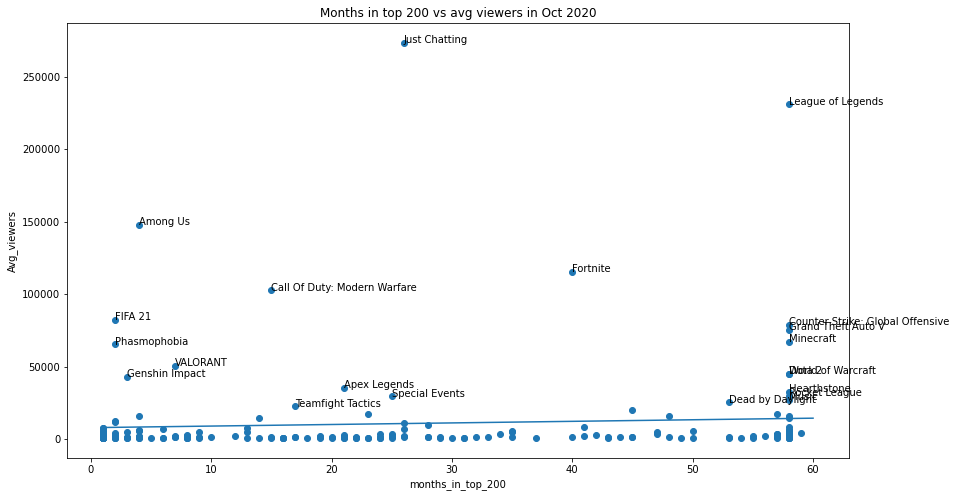

R squared: 0.005837877362619981


In [9]:
# function to quickly get linear regression model with input x and observed ouput y, no need to reshape data prior
def get_linear_reg(x, y):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    return model

# function to quickly get R-squared from given model with input x and observed ouput y, no need to reshape data prior
def get_r_2(model, x, y):
    return model.score(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

reg = get_linear_reg(oct_game_data['months_in_top_200'], oct_game_data['Avg_viewers'])

fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(oct_game_data['months_in_top_200'], oct_game_data['Avg_viewers'])
ax.set_xlabel('months_in_top_200')
ax.set_ylabel('Avg_viewers')
ax.set_title('Months in top 200 vs avg viewers in Oct 2020')

# only labeling games with Avg_viewers > 20,000 since these will be the games of interest and 
# other games' labels will not be legible due to crowding
for i, game in enumerate(oct_game_data['Game']):
    if list(oct_game_data['Avg_viewers'])[i] > 20000:
        ax.annotate(game, (list(oct_game_data['months_in_top_200'])[i], list(oct_game_data['Avg_viewers'])[i]))

# plotting the linear regression model
ax.plot(np.arange(1, 61), [y for [y] in reg.predict(np.arange(1, 61).reshape(-1, 1))])
plt.show()

print("R squared: " + str(get_r_2(reg, oct_game_data['months_in_top_200'], oct_game_data['Avg_viewers'])))

There doesn't really seem to be any correlation between months spent in the top 200 and average viewers, with the low R squared value confirming this. Games with anywhere from 0-58 months in the top 200 can have similar average viewers. 

How about average viewers to channel ratio?

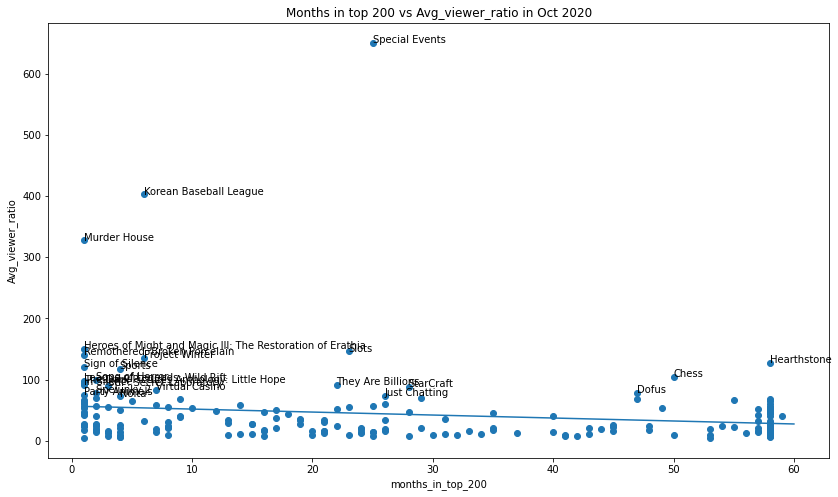

R squared: 0.030044094502580054


In [10]:
reg = get_linear_reg(oct_game_data['months_in_top_200'], oct_game_data['Avg_viewer_ratio'])

fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(oct_game_data['months_in_top_200'], oct_game_data['Avg_viewer_ratio'])
ax.set_xlabel('months_in_top_200')
ax.set_ylabel('Avg_viewer_ratio')
ax.set_title('Months in top 200 vs Avg_viewer_ratio in Oct 2020')

# only labeling games with Avg_viewer_ratio > 70 since these will be the games of interest and 
# other games' labels will not be legible due to crowding
for i, game in enumerate(oct_game_data['Game']):
    if list(oct_game_data['Avg_viewer_ratio'])[i] > 70:
        ax.annotate(game, (list(oct_game_data['months_in_top_200'])[i], list(oct_game_data['Avg_viewer_ratio'])[i]))
        
# plotting the linear regression model
ax.plot(np.arange(1, 61), [y for [y] in reg.predict(np.arange(1, 61).reshape(-1, 1))])
plt.show()

print("R squared: " + str(get_r_2(reg, oct_game_data['months_in_top_200'], oct_game_data['Avg_viewer_ratio'])))

Looks like it's the same case here according to the plot and the R squared value: no correlation. 

So since how long a game has been popular has no correlation to avg_viewers or avg_viewer_ratio, let's instead just look at these metrics to find out which games would be the best to get viewers. First, let's see what's the average ratio for viewers to channels across the top 200 games in October.

In [11]:
avg_viewers = int(oct_global_data['Avg_viewers'])
avg_channels = int(oct_global_data['Avg_channels'])
print("Average global viewer/channel ratio: " + str(avg_viewers / avg_channels))
print("Average game viewer/channel ratio: " + str(oct_game_data['Avg_viewer_ratio'].mean()))

Average global viewer/channel ratio: 25.089975832720395
Average game viewer/channel ratio: 43.22475


It appears that the global viewer ratio is different from the average viewer ratio of all games. This might be because of some games with a low number of viewers and channels that are able to have a very high viewer ratio. Let's look at 2 bar plots with the same games in the same order showing their ratio and average viewer count:

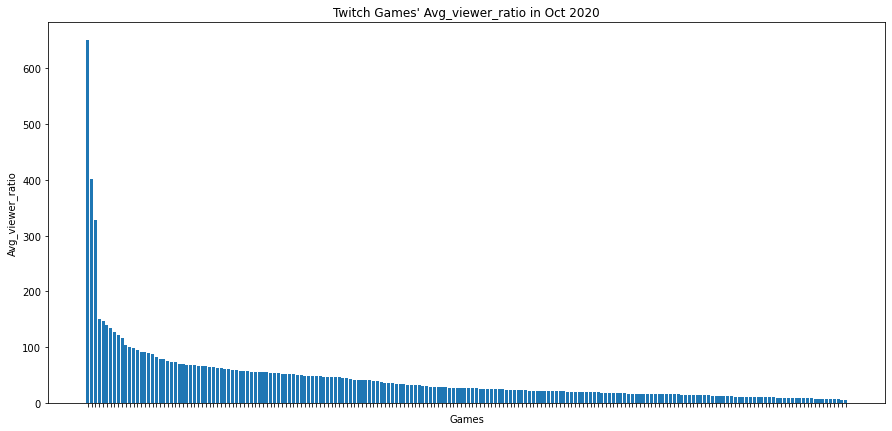

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(oct_game_data.sort_values(['Avg_viewer_ratio'], ascending=False)['Game'], oct_game_data.sort_values(['Avg_viewer_ratio'], ascending=False)['Avg_viewer_ratio'])
ax.set_xlabel('Games')
ax.set_ylabel('Avg_viewer_ratio')
ax.set_title('Twitch Games\' Avg_viewer_ratio in Oct 2020')
ax.set_xticklabels("")
plt.show()

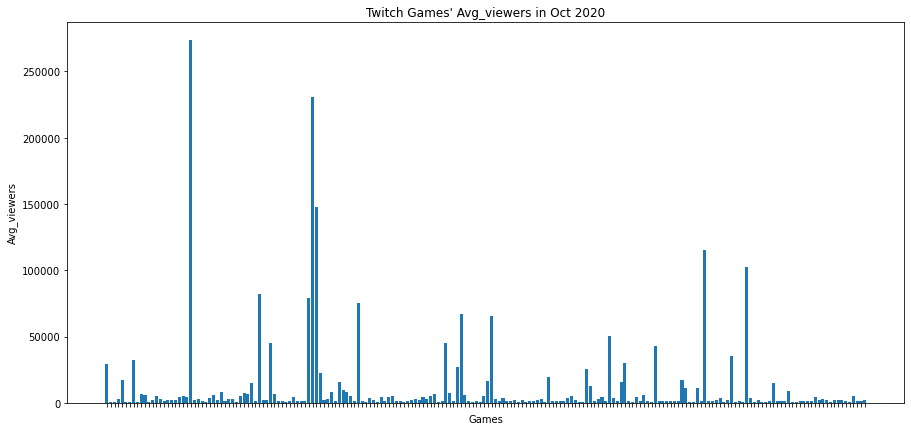

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(oct_game_data.sort_values(['Avg_viewer_ratio'], ascending=False)['Game'], oct_game_data.sort_values(['Avg_viewer_ratio'], ascending=False)['Avg_viewers'])
ax.set_xlabel('Games')
ax.set_ylabel('Avg_viewers')
ax.set_title('Twitch Games\' Avg_viewers in Oct 2020')
ax.set_xticklabels("")
plt.show()

If you're wondering why the x-axis isn't labeled, it's because there's no good way to label all the games and have them be legible. But the order of the games is the same for the above two plots for comparison. 

And it looks like there are a few games with a very high viewer ratio that also have very low average viewers, which checks out with the higher game viewer ratio compared to the global viewer ratio. However, the first game (on the far left) has a decently high average viewers, so let's look at the top 15 games in terms of viewer ratio to see why this might be.

In [14]:
oct_game_data.sort_values(['Avg_viewer_ratio'], ascending=False).drop(columns=['Month', 'Year', 'months_in_top_200']).head(15)

,Game,Rank,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
11417,Special Events,18,21878399,33638,652366,283,4720,29446,45,650.41
11570,Korean Baseball League,171,704047,1749,16985,19,14,947,2,402.54
11583,Murder House,184,607620,1855,53311,29,655,817,2,327.56
11475,Heroes of Might and Magic III: The Restoration...,76,2287639,15223,18675,49,613,3078,20,150.28
11422,Slots,23,12940464,88631,112324,214,3583,17416,119,146.00
11591,Remothered: Broken Porcelain,192,568626,4051,53086,79,891,765,5,140.37
11571,Project Winter,172,702623,5208,34078,46,881,945,7,134.91
11415,Hearthstone,16,24271349,190063,142885,492,14247,32666,255,127.70
11575,Sign of Silence,176,683145,5627,43542,36,2251,919,7,121.40
11440,Sports,41,4928055,42136,146699,150,4817,6632,56,116.96


The game in question (which isn't really a game) is Special Events. Special Events is a category for, well, special events. If there's an awards show or a press conference / event ([E3](https://en.wikipedia.org/wiki/E3), for example), it will be streamed under the Special Events category. These special events have a high viewer count but low channel count since only a handful of channels will be streaming them, usually a few official ones and then individual streamers re-streaming them to have watch parties within their communities. Because of its nature, I will be considering Special Events as a special case and will not include it in the discussion of which games / categories are statistically the best to stream. I will go ahead and remove Special Events from the table:

In [15]:
oct_game_data = oct_game_data[oct_game_data['Game'] != "Special Events"]

So, we want games with high average viewers and a high viewer ratio. But according to the two plots for before, there doesn't seem to be any relationship between the two. Let's perform a linear regression to see whether or not this is actually the case.

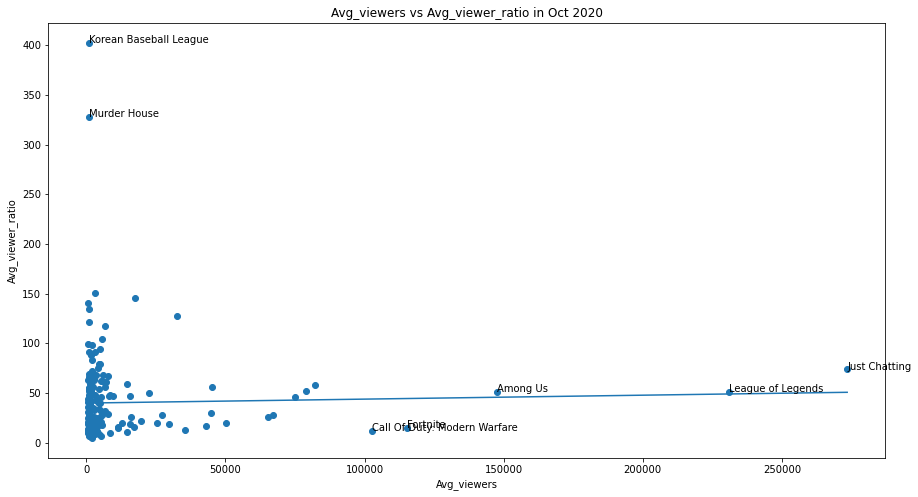

R squared: 0.0007910126730943379


In [16]:
reg = get_linear_reg(oct_game_data['Avg_viewers'], oct_game_data['Avg_viewer_ratio'])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(oct_game_data['Avg_viewers'], oct_game_data['Avg_viewer_ratio'])
ax.set_xlabel('Avg_viewers')
ax.set_ylabel('Avg_viewer_ratio')
ax.set_title('Avg_viewers vs Avg_viewer_ratio in Oct 2020')

# only labeling games with Avg_viewers > 100,000 or Avg_viewer_ratio > 200 since these will be the games of interest and 
# other games' labels will not be legible due to crowding
for i, game in enumerate(oct_game_data['Game']):
    if list(oct_game_data['Avg_viewers'])[i] > 100000 or list(oct_game_data['Avg_viewer_ratio'])[i] > 200:
        ax.annotate(game, (list(oct_game_data['Avg_viewers'])[i], list(oct_game_data['Avg_viewer_ratio'])[i]))
        
# plotting the linear regression model
ax.plot(np.arange(1, oct_game_data['Avg_viewers'].max()), [y for [y] in reg.predict(np.arange(1, oct_game_data['Avg_viewers'].max()).reshape(-1, 1))])
plt.show()

print("R squared: " + str(get_r_2(reg, oct_game_data['Avg_viewers'], oct_game_data['Avg_viewer_ratio'])))

According to the plot and the low value for R squared, it looks like there is indeed no relationship between the two. We need to find a way to accurately describe how good a game is to stream.

## Quantifying games using a custom score system

In order to quantify how good a game is to stream, I will make a new column, ```score```, that will combine a game's average viewers and its viewer ratio to create a metric that takes both into account since they are both desirable traits. I will multiply the two together and then divide by 100,000 just to keep the final score from being unnecessarily large.

In [17]:
oct_game_data.insert(12, 'score', float)
for index, row in oct_game_data.iterrows():
    oct_game_data.at[index, 'score'] = row['Avg_viewers'] * row['Avg_viewer_ratio'] / 100000

oct_game_data.drop(columns=['Month', 'Year', 'months_in_top_200']).head()

,Game,Rank,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,score
11400,Just Chatting,1,203159545,2757457,684417,6778,355568,273431,3711,73.68,201.464
11401,League of Legends,2,171613067,3367157,2020835,8520,246211,230973,4531,50.97,117.727
11402,Among Us,3,109716919,2160986,753943,9142,386445,147667,2908,50.77,74.9705
11403,Fortnite,4,85559924,5777917,388650,15148,533320,115154,7776,14.81,17.0543
11404,Call Of Duty: Modern Warfare,5,76217178,6653986,396270,22121,428944,102580,8955,11.45,11.7454


Now, let's just double check to see whether ```score``` does actually represent both average viewers and viewer ratio by using linear regression.

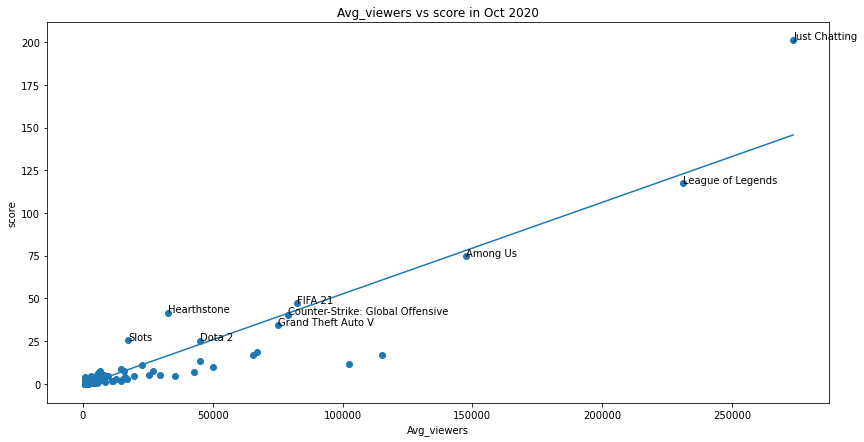

R squared: 0.8525848207520136


In [18]:
reg = get_linear_reg(oct_game_data['Avg_viewers'], oct_game_data['score'])

fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(oct_game_data['Avg_viewers'], oct_game_data['score'])
ax.set_xlabel('Avg_viewers')
ax.set_ylabel('score')
ax.set_title('Avg_viewers vs score in Oct 2020')

# only labeling games with score > 20 since these will be the games of interest and 
# other games' labels will not be legible due to crowding
for i, game in enumerate(oct_game_data['Game']):
    if list(oct_game_data['score'])[i] > 20:
        ax.annotate(game, (list(oct_game_data['Avg_viewers'])[i], list(oct_game_data['score'])[i]))
        
# plotting the linear regression model
ax.plot(np.arange(1, oct_game_data['Avg_viewers'].max()), [y for [y] in reg.predict(np.arange(1, oct_game_data['Avg_viewers'].max()).reshape(-1, 1))])
plt.show()

print("R squared: " + str(get_r_2(reg, oct_game_data['Avg_viewers'], oct_game_data['score'])))

Judging by the plot itself and the R-squared value of 0.85, I can say that there is a decent relationship between average viewers and score. 

And for the relationship between viewer ratio and score...

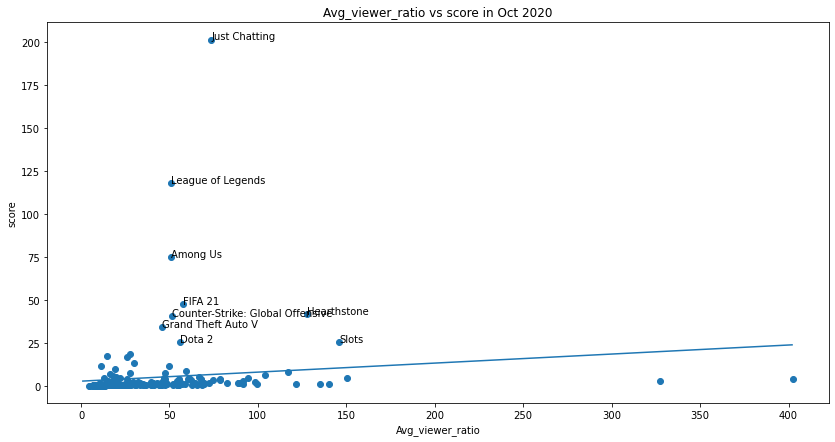

R squared: 0.01626876075657402


In [19]:
reg = get_linear_reg(oct_game_data['Avg_viewer_ratio'], oct_game_data['score'])

fig, ax = plt.subplots(figsize=(14,7))
ax.scatter(oct_game_data['Avg_viewer_ratio'], oct_game_data['score'])
ax.set_xlabel('Avg_viewer_ratio')
ax.set_ylabel('score')
ax.set_title('Avg_viewer_ratio vs score in Oct 2020')

# only labeling games with score > 20 since these will be the games of interest and 
# other games' labels will not be legible due to crowding
for i, game in enumerate(oct_game_data['Game']):
    if list(oct_game_data['score'])[i] > 20:
        ax.annotate(game, (list(oct_game_data['Avg_viewer_ratio'])[i], list(oct_game_data['score'])[i]))
        
# plotting the linear regression model
ax.plot(np.arange(1, oct_game_data['Avg_viewer_ratio'].max()), [y for [y] in reg.predict(np.arange(1, oct_game_data['Avg_viewer_ratio'].max()).reshape(-1, 1))])
plt.show()

print("R squared: " + str(get_r_2(reg, oct_game_data['Avg_viewer_ratio'], oct_game_data['score'])))

There doesn't appear to be a strong relationship here. However, keep in mind that the average viewer count will usually be much bigger than the viewer ratio, meaning that the average viewers will have a greater effect on the score than viewer ratio. The degree to which a viewer ratio will lead to a high score depends on the average viewers. A game's high viewer ratio won't result in a high score if its average viewers is low.

Finally, let's rank the games by score and see which are the best games to stream if you just want to get a lot of viewers:

In [20]:
oct_game_data.sort_values(by='score', ascending=False).drop(columns=['Month', 'Year', 'months_in_top_200']).head(10)

,Game,Rank,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,score
11400,Just Chatting,1,203159545,2757457,684417,6778,355568,273431,3711,73.68,201.464
11401,League of Legends,2,171613067,3367157,2020835,8520,246211,230973,4531,50.97,117.727
11402,Among Us,3,109716919,2160986,753943,9142,386445,147667,2908,50.77,74.9705
11405,FIFA 21,6,61128836,1060451,474733,3830,100606,82272,1427,57.64,47.4216
11415,Hearthstone,16,24271349,190063,142885,492,14247,32666,255,127.70,41.7145
11406,Counter-Strike: Global Offensive,7,58560804,1138329,434419,2976,124370,78816,1532,51.44,40.543
11407,Grand Theft Auto V,8,55833045,1225664,202629,3627,98469,75145,1649,45.55,34.2285
11422,Slots,23,12940464,88631,112324,214,3583,17416,119,146.00,25.4274
11411,Dota 2,12,33523506,599493,155576,1573,28700,45119,806,55.92,25.2305
11408,Minecraft,9,49798217,1802763,472079,4489,235174,67023,2426,27.62,18.5118


So it looks like, as of October 2020, the best games to stream on Twitch are:

1. **[Just Chatting](https://www.twitch.tv/directory/game/Just%20Chatting)**
2. **[League of Legends](https://www.twitch.tv/directory/game/League%20of%20Legends)**
3. **[Among Us](https://www.twitch.tv/directory/game/Among%20Us)**
4. **[FIFA 21](https://www.twitch.tv/directory/game/FIFA%2021)**
5. **[Hearthstone](https://www.twitch.tv/directory/game/Hearthstone)**
6. **[Counter-Strike: Global Offensive](https://www.twitch.tv/directory/game/Counter-Strike%3A%20Global%20Offensive)**
7. **[Grand Theft Auto V](https://www.twitch.tv/directory/game/Grand%20Theft%20Auto%20V)**
8. **[Slots](https://www.twitch.tv/directory/game/Slots)**
9. **[Dota 2](https://www.twitch.tv/directory/game/Dota%202)**
10. **[Minecraft](https://www.twitch.tv/directory/game/Minecraft)**

# Conclusion
While you would think that the best games to stream would be the most popular ones, that doesn't seem to necessarily be the case. Yes, all the games in the top 10 above are relatively popular compared to all 200 top games, but I was surprised that *Hearthstone*, which was ranked 16th in watch time, ended up being ranked 5th on my list. This is primarily due to *Hearthstone* having a very good viewer ratio for a game of its size and popularity (127.7 viewers per channel).

Even though *[Fortnite](https://www.twitch.tv/directory/game/Fortnite)* and *[Call Of Duty: Modern Warfare](https://www.twitch.tv/directory/game/Call%20Of%20Duty%3A%20Modern%20Warfare)* were ranked 4th and 5th respectively in terms of watch time, they didn't even make the top 10 of my list due to having very poor viewer ratios (14.81 & 11.45	respectively). 

So these are the best games to stream on Twitch as of <u>October 2020</u>. I stress this because what's popular and what's not can change very quickly. Ranked 3rd on my list is *Among Us*, a game which came out in 2018 and only suddenly got popular earlier this year. There might be some other undiscovered game that will have a surge in popularity and end up being better than many other games on my list. *FIFA 21* is another game that should be pointed out because while it will probably remain popular for a while, it also just came out in October 2020, so its current popularity might be due to its recent release. 

It's very difficult to tell what will be popular on Twitch, but it's very easy to see what is currently popular on Twitch. So if you want try to get as many viewers as possible, streaming the above 10 games are your best bet!